(data-science-lifecycle)=
# 数据科学生命周期

数据科学主要围绕数据进行探索实验，一个数据科学项目涉及到很多步骤，比如数据准备、建模并部署到生产环境。如 {numref}`fig-data-science-lifecycle` 所示， {cite}`shearer2000CRISPDM` 首次提出了一个业界标准 CRISP-DM（Cross-industry standard process for data mining），描述数据科学的生命周期。

```{figure} ../img/ch-data-science/data-science-lifecycle.svg
---
width: 400px
name: fig-data-science-lifecycle
---
数据科学生命周期
```

CRISP-DM 主要涉及六大部分：

* 理解业务
* 理解数据
* 准备数据
* 建模
* 验证
* 部署

## 理解业务

理解业务逻辑在任何项目的成功中起着非常重要的作用，因为数据科学最终目的是服务业务，任何数据相关探索都要围绕着业务目标展开。在进行具体的数据科学建模之前，数据分析师首先应该深入理解业务。比如，电商数据分析需要首先理解电商的内在逻辑，用户需求与公司商业目标，才能在后续建模分析中更好地服务用户与公司。

房价预测是一个典型的数据科学场景，我们选择了加利福尼亚房价数据集进行演示，该数据集提供了房价，街区收入、房屋年龄、房间数、卧室数、街区人口等特征信息。在这个业务场景下，我们要明确业务：买卖双方根据房屋的情况谈判，使得房屋在一个合理的价格下成交，房屋价格受很多因素影响。

## 理解数据

在理解业务逻辑之后，下一步是理解数据。数据分析师需要与业务团队密切合作，了解该业务有哪些数据、哪些第三方数据。具体而言，数据分析师需要深入了解数据是如何生成的、数据的描述、数据类型和许多其他信息。这个阶段，数据分析师可能还需要进行探索性数据分析（Exploratory Data Analysis，EDA），通过查看数据的分布或者数据可视化，了解数据的基本情况。

这里我们对房价数据集进行探索。值得注意的是，企业的数据往往比开源数据更复杂，与业务结合得更紧密。

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

cal = fetch_california_housing(data_home="../data/", as_frame=True)
cal_df = pd.DataFrame(cal.data,
                             columns=cal.feature_names)
cal_df['MedHouseValue'] = pd.Series(cal.target)
cal_df.head(3)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521

数据一共有 8 列，我们现在希望来预测 `MedHouseValue` 这一列，也就是房价。我们可以使用一些可视化方法，对整个数据有一个宏观的了解。

In [2]:
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

sns.scatterplot(data=cal_df, x="MedInc",y='MedHouseValue',
    hue='MedHouseValue', palette='cool', legend=False)

<Axes: xlabel='MedInc', ylabel='MedHouseValue'>

从图表中可以看到，房价与收入有一定相关性。

## 准备数据

理解基本情况之后，下一个步骤是数据准备。这一步也被称为数据清洗（Data Cleaning）或数据整理（Data Wrangling）。这一步包括选择数据、多源数据的融合、清洗数据、删除不需要的列和特征、处理缺失值和异常值；通过特征工程从现有数据中构建新数据，派生新特征；将数据格式化为下一步所需的结构。对于机器学习任务，还要将数据切分为训练集和测试集。这一步也非常依赖探索性数据分析，识别数据的模式和异常值。对数据的洞察可以帮助找到正确的算法模型。

网络上的开源数据往往已经被处理过，实际业务场景的数据准备难度比开源数据大很多。
因此，数据准备是最耗时的步骤，它可能会占整个项目时间的 70%-90%，然而它是整个数据科学生命周期中最重要的步骤。

在房价预测这个场景下，当前我们使用的这个开源数据集的特征只有 8 列。为了更好地做这个任务，应该挖掘更多的信息，包括房屋面积等更详细的信息。如果能从其他数据源获取的数据，并将这些数据融合，能显著提升最终要过，但数据融合需要进行数据清洗和对齐工作。

数据的预处理非常依赖数据分析师的经验，这里不仔细展开讲解。现在我们只对数据进行切分，分为训练集和测试集。

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cal.data,
                                                    cal.target, random_state=11)

## 建模

建模被认为是数据分析的核心。建模将准备好的数据作为输入，输出所需要预测的值。建模需要对业务问题本身进行提炼，确定当前的数据科学问题是分类问题、回归问题、聚类问题或者其他问题，选择一个合适的模型处理数据。选择模型后，需要在各种算法中调整每个模型的超参数以实现所需的性能。

现在，我们使用线性回归算法对房价进行建模：

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

## 验证

在正式部署到生产系统之前，我们还需要通过验证模型的表现。有很多评估指标验证模型的效果，比如模型的准确性。这里将预测值与真实值进行了比较；也可以尝试不同的模型和不同的超参数，观察准确性。

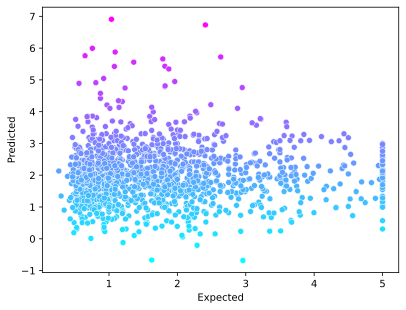

In [5]:
predicted = linear_regression.predict(X_test)
expected = y_test

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

## 部署

模型需要经过严格验证之后才能部署上线。在正式给所有用户使用之前，除了在离线测试之外，还可能进行线上灰度测试。离线测试，指的是只线下验证，基于历史数据，不将模型推送给线上用户；灰度测试，就是在该项目正式推送给全量用户前，选择特定人群试用，根据效果逐步扩大试用者数量，由“灰”到“黑”。如果灰度测试效果不佳，还需要继续迭代，重复上面的各个步骤。
如果数据收集不正确，或数据清洗不合理，或离线测试评估指标有问题，模型都无法取得较好的线上效果。

## 小结

以上各个步骤共同构成了数据科学的生命周期，从 {numref}`data-science-lifecycle` 和案例中可以看到，数据科学是一个反复迭代的过程，不同步骤之间没有特别明显的界线。